# 데이터 병합

In [ ]:
'''from google.colab import files
files.upload()'''

'from google.colab import files\nfiles.upload()'

In [ ]:
import pandas as pd
dataset_total = pd.read_csv('/content/drive/Shareddrives/데마-돼지귀엽조/프로젝트/csv 정리 파일/total_revised.csv', encoding='cp949')
topic_df = pd.read_csv('/content/drive/Shareddrives/데마-돼지귀엽조/프로젝트/코딩결과csv/topics_content.csv', encoding='euc-kr')
sentiment_df = pd.read_csv('/content/drive/Shareddrives/데마-돼지귀엽조/프로젝트/코딩결과csv/sentiment_result.csv', encoding='euc-kr')
#dataset_total = pd.read_csv('total_revised.csv', encoding='cp949')
#dataset_total = pd.read_csv('topics_content.csv', encoding='cp949')
#dataset_total = pd.read_csv('sentiment_result.csv', encoding='cp949')

In [ ]:
dataset_total.set_index(dataset_total.columns[0], inplace=True)
topic_df.set_index(topic_df.columns[0], inplace=True)
sentiment_df.set_index(sentiment_df.columns[0], inplace=True)
dataset_total.index.name = None
topic_df.index.name = None
sentiment_df.index.name = None

In [ ]:
dataset_total.head()

,accident_no,reception_date,item_code,production_country_code,contract_amount,sales_method_code,title_of_accdient,content_of_accdient,answer_content
1,2020-0000623,2020-01-02,171199.0,201.0,NaN,31.0,액체 손난로 터진경우 차량 청소비 배상 관련 문의,언제 12월24일 어디서 푸른팬시 제조처 물품을 누가 신청인 자녀가 무엇을 ...,제품하자로 인한 피해 배상 요구는 가능함 실질적인 피해에 대한 조정 기관임 추상적시...
2,2020-0001036,2020-01-02,379902.0,201.0,NaN,10.0,에버랜드 자유이용권 환불 요청,에버랜드 환불 관련임 3개월전에 다녀옴 놀이기구를 타다가 손에 상처가 남 에버랜드...,사고당시 환불요청해서 환불이 이루어지지 않았다면 환불이 어려움 사고를 입증하고 환...
3,2020-0001324,2020-01-02,130108.0,201.0,60000.0,30.0,유리컵 손다친경우 치료비 배상 거부 문의,언제 11월 어디서 쿠팡에서 누가 신청인 무엇을 유리컵을 어떻게 6개 셋트 3만원주...,제품하자로 인한 신체피해라면 치료비일실소득경비 요구 가능함 제품하자가 아니라는건 사...
4,2020-0000898,2020-01-02,110403.0,201.0,NaN,22.0,순살치킨 이물 배상 건,언제 202011 0100시경어디서 BBQ치킨에서 순살치킨을 주문 베송받음누가 본인...,답변이물혼입 제품교환 또는 구입가 환급 부작용 치료비 경비 및 일실소득 배상서...
5,2020-0000726,2020-01-02,139911.0,201.0,NaN,10.0,정수기 이물질관련 문의,청호나이스 정수기를 2015년도에 구입하여 사용을 하는데 고장으로 AS를 받았는데도...,소비자에게 한국소비자원에 피해구제 접수를 하시도록 안내


In [ ]:
dataset_total['reception_date'].isna().sum()

30

In [ ]:
topic_df.head()

,dominant_topic,perc_contribution,topic_keywords,content
1209,8,0.899,"제품, 필터, 판매, 환불, 업체, 사용, 구입, 아이, 물질, 전화",언제 28발생어디서 정관장누가 본인무엇을 홈삼제품 절편홍삼어떻게 제품을 먹다가 치아...
1383,8,0.894,"제품, 필터, 판매, 환불, 업체, 사용, 구입, 아이, 물질, 전화",1 현황 1월 30일 SK스토아 홈쇼핑을 통해 종근당 크릴오일 총 12개 박스로...
20656,8,0.891,"제품, 필터, 판매, 환불, 업체, 사용, 구입, 아이, 물질, 전화",언제 일주일전어디서 지마켓누가 신청인무엇을 ...
4023,8,0.881,"제품, 필터, 판매, 환불, 업체, 사용, 구입, 아이, 물질, 전화",언제 2월 1일어디서 공연마루김범수편누가 신청인 이름무엇을 공연 김범수콘서트어...
1326,4,0.881,"정수기, 물질, 사용, 매트, 제품, 업체, 해지, 위약금, 친환경, 환불",1 2014년식 그랜져 주행거리 66000 엔진 오일 누유로 수리입고2 엔진 교체...


In [ ]:
sentiment_df.head()

,content,result,six_ws,score,ratio,count
17,"['구입', '내용', '인터', '쇼핑몰', '펜', '저', '씨', '몰을',...",0.0,0,-3.0,-0.620468,13.0
30,"['컨', '설치', '과정', '중', '콜센터', '접', '수시', '미리',...",1.0,0,-5.0,-1.034114,5.0
41,"['언', '배송', '받음', '디', '서', '번', '소비자', '무엇', ...",1.0,1,-2.0,-0.413646,2.0
42,"['소비', '는', '년', '중순', '경', '홍보', '관', '서', '파...",1.0,0,-3.0,-0.620468,3.0
52,"['지난', '카카오', '미니', '선물', '받았으', '지속', '적', '네...",0.0,0,-3.0,-0.620468,3.0


In [ ]:
merged_df = pd.DataFrame()
merged_df['result'] = sentiment_df['result']
merged_df['ratio'] = sentiment_df['ratio']
merged_df = merged_df.astype({'result':'int'})
merged_df

,result,ratio
17,0,-0.620468
30,1,-1.034114
41,1,-0.413646
42,1,-0.620468
52,0,-0.620468
...,...,...
66797,0,-0.206823
66798,0,0.206823
66799,0,0.206823
66800,0,-0.413646


In [ ]:
merged_df =  pd.merge(merged_df, topic_df, left_index=True, right_index=True, how='left')
merged_df.dropna(inplace=True)
merged_df.drop(['perc_contribution', 'topic_keywords', 'content'], axis=1, inplace=True)
merged_df = merged_df.astype({'dominant_topic':'int'})
merged_df

,result,ratio,dominant_topic
17,0,-0.620468,8
30,1,-1.034114,8
41,1,-0.413646,8
42,1,-0.620468,2
52,0,-0.620468,8
...,...,...,...
66598,0,-0.206823,4
66600,0,-0.206823,8
66603,1,0.206823,5
66604,1,-0.206823,1


In [ ]:
merged_df =  pd.merge(merged_df, dataset_total, left_index=True, right_index=True, how='left')
merged_df = merged_df[['reception_date', 'dominant_topic', 'ratio', 'result']]
merged_df.dropna(inplace=True)
merged_df['reception_date'] = pd.to_datetime(merged_df['reception_date'])
merged_df

,reception_date,dominant_topic,ratio,result
17,2020-01-02,8,-0.620468,0
30,2020-01-02,8,-1.034114,1
41,2020-01-03,8,-0.413646,1
42,2020-01-03,2,-0.620468,1
52,2020-01-03,8,-0.620468,0
...,...,...,...,...
66598,2016-10-13,4,-0.206823,0
66600,2016-12-30,8,-0.206823,0
66603,2016-12-21,5,0.206823,1
66604,2016-12-21,1,-0.206823,1


In [ ]:
merged_df.rename(columns={'ratio':'sentiment_score'}, inplace=True)
merged_df

,reception_date,dominant_topic,sentiment_score,result
17,2020-01-02,8,-0.620468,0
30,2020-01-02,8,-1.034114,1
41,2020-01-03,8,-0.413646,1
42,2020-01-03,2,-0.620468,1
52,2020-01-03,8,-0.620468,0
...,...,...,...,...
66598,2016-10-13,4,-0.206823,0
66600,2016-12-30,8,-0.206823,0
66603,2016-12-21,5,0.206823,1
66604,2016-12-21,1,-0.206823,1


In [ ]:
merged_df[['dominant_topic', 'sentiment_score', 'result']].to_csv('merged_result.csv', encoding='euc-kr')

# 토픽별 분석

In [ ]:
print('전체 감성 평균: ', merged_df['sentiment_score'].mean())
print('전체 종결 확률: ', merged_df['result'].mean())

전체 감성 평균:  -0.28283342663108707
전체 종결 확률:  0.42825189263592567


In [ ]:
topic_label = ['렌탈제품', '생활건강', '가전제품', '화장품트러블 및 식품위생', '차량정비', '사고', '의류', '생필품', '기호식품', '휴게시설', '기타생활잡화']

In [ ]:
topic_dic = {}
for index, value in enumerate(topic_label):
    topic_dic[index+1] = {'topic_label':value,
                        'count':merged_df[merged_df['dominant_topic']==(index)]['sentiment_score'].count(),
                        'proportion':merged_df[merged_df['dominant_topic']==(index)]['sentiment_score'].count()/len(merged_df),
                        'sentiment_mean':merged_df[merged_df['dominant_topic']==(index)]['sentiment_score'].mean(),
                        'closed_probability':merged_df[merged_df['dominant_topic']==(index)]['result'].mean(),
                        'closed_sentiment_mean':merged_df[(merged_df['dominant_topic']==(index))&(merged_df['result']==1)]['sentiment_score'].mean(),
                        'rejectedd_sentiment_mean':merged_df[(merged_df['dominant_topic']==(index))&(merged_df['result']==0)]['sentiment_score'].mean()}
topic_describe_df = pd.DataFrame(topic_dic).transpose()
topic_describe_df

,topic_label,count,proportion,sentiment_mean,closed_probability,closed_sentiment_mean,rejectedd_sentiment_mean
1,렌탈제품,26,0.004474,-0.230687,0.653846,-0.194657,-0.298744
2,생활건강,323,0.055575,-0.291985,0.455108,-0.278578,-0.303183
3,가전제품,392,0.067447,-0.285964,0.443878,-0.265066,-0.302644
4,화장품트러블 및 식품위생,1113,0.1915,-0.270189,0.440252,-0.244811,-0.29015
5,차량정비,1625,0.279594,-0.285352,0.435077,-0.209163,-0.344029
6,사고,283,0.048692,-0.277713,0.441696,-0.249842,-0.299762
7,의류,89,0.015313,-0.260271,0.404494,-0.247038,-0.26926
8,생필품,22,0.003785,-0.244427,0.409091,-0.045961,-0.381827
9,기호식품,1018,0.175155,-0.287683,0.424361,-0.249911,-0.315528
10,휴게시설,668,0.114935,-0.290419,0.428144,-0.271907,-0.304279


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

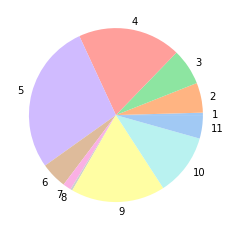

In [ ]:
count = topic_describe_df['count'].tolist()
topic = list(range(1,12))
colors = sns.color_palette('pastel')
plt.pie(count, labels=topic, colors=colors)
plt.show()

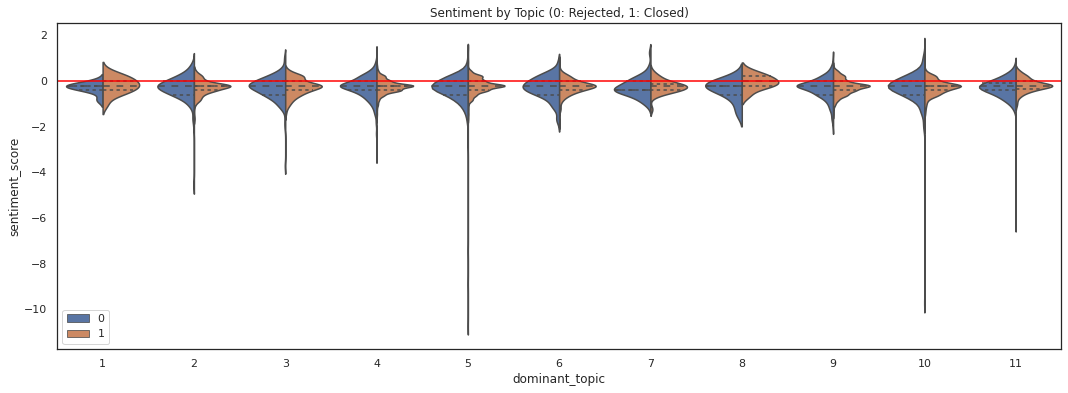

In [ ]:
sns.set(rc = {'figure.figsize':(18,6)})
sns.set_style('white')
sns.violinplot(x='dominant_topic', y='sentiment_score', data=merged_df, hue='result', scale='width', split=True, inner='quartile').set_xticklabels(list(range(1,12)))
plt.title("Sentiment by Topic (0: Rejected, 1: Closed)")
plt.axhline(0, color='red')
plt.legend(loc='lower left')
plt.show()

No handles with labels found to put in legend.


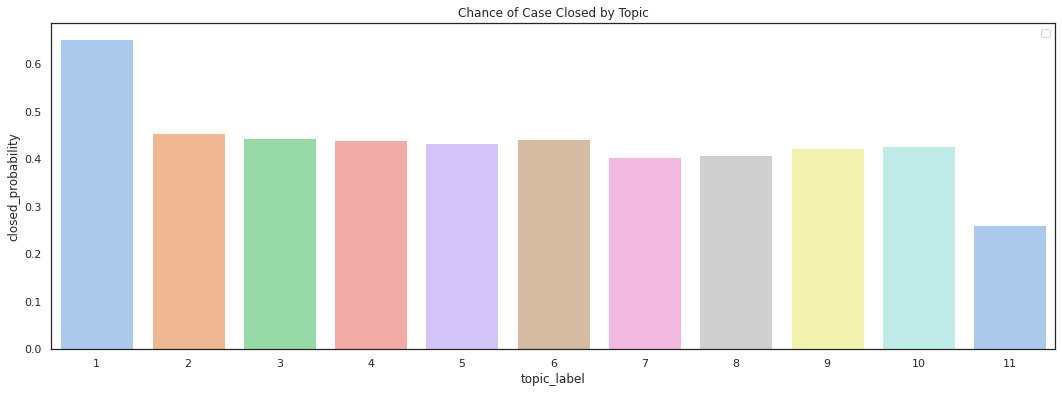

In [ ]:
sns.set(rc = {'figure.figsize':(18,6)})
sns.set_style('white')
sns.barplot(x='topic_label', y='closed_probability', data=topic_describe_df, palette='pastel').set_xticklabels(list(range(1,12)))
plt.title("Chance of Case Closed by Topic")
plt.legend(loc='best')
plt.show()

# 시계열 분석

In [ ]:
merged_df2 = merged_df[['reception_date', 'dominant_topic']]
merged_df2.set_index('reception_date', inplace=True)
merged_df2.index.name = None
merged_df2['dominant_topic'] = merged_df2['dominant_topic'].apply(lambda x: x + 1)
merged_df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,dominant_topic
2020-01-02,9
2020-01-02,9
2020-01-03,9
2020-01-03,3
2020-01-03,9
...,...
2016-10-13,5
2016-12-30,9
2016-12-21,6
2016-12-21,2


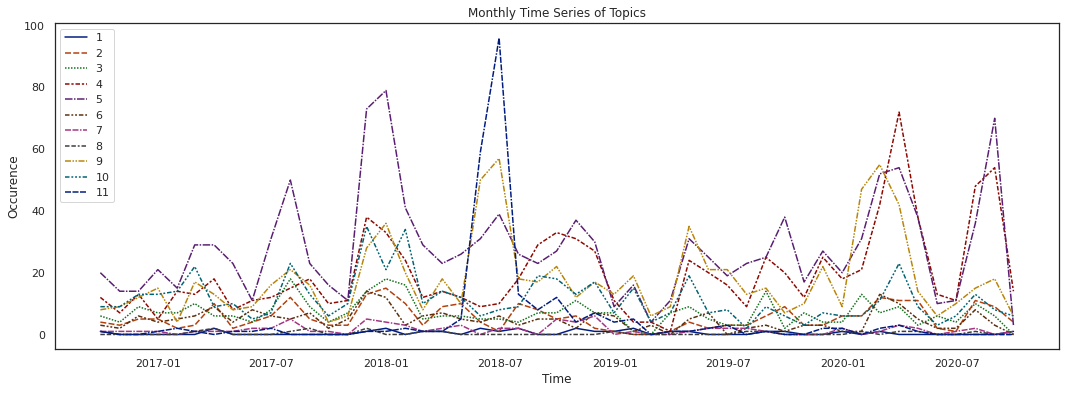

In [ ]:
df_time_series = pd.DataFrame()
for i in range(1, 12):
    df_time_series[i] = merged_df2[merged_df2['dominant_topic']==i].resample('M').count()
df_time_series.fillna(0, inplace=True)
df_time_series
sns.lineplot(data=df_time_series, palette='dark')
plt.xlabel('Time')
plt.ylabel('Occurence')
plt.title("Monthly Time Series of Topics")
plt.legend(loc='best')
plt.show()

In [ ]:
def accident_finder(df_total, df_merged, topic_number, start_date, end_date):
    topic_number = topic_number - 1
    mask = df_merged[(df_merged['dominant_topic']==topic_number)&(df_merged['reception_date']>=start_date)&(df_merged['reception_date']<=end_date)].index.tolist()
    return df_total.loc[mask, ['title_of_accdient','content_of_accdient']]

In [ ]:
accident_finder(dataset_total, merged_df, 11, '2018-05-01', '2018-06-30')

,title_of_accdient,content_of_accdient
25922,대진침대 관련 집단분쟁 조정 문의,모델명 웨스턴슬리퍼 구매일 2015년 경 회수 신청은 하였으나 진행되지 않고...
25963,대진침대 상담,대진침대를 사용하고있다 업체가 연락이 안된다 어떻게 해야하나
25986,라돈침대 리콜,최신 문제가 되고 있는 대진침대 구입자로 저희집에 2대가 있습니다 하나는 2010년...
26013,대진침대 분쟁조정 접수 문의,대진침대 이용하고 있음 모델명 그린슬리퍼 2017년 7월 10일 제조일임 0...
26018,대진침대 라돈 검출된 침대의 환불 요청,신청인은 2016년 12월 11일 인터넷에서 아이파워 플러스 퀸싸이즈 침대를 구입...
...,...,...
31976,대진침대방사성 물질 라돈 발생,2010년 12월 부터 현재 까지 대진침대 뉴웨스턴 슬리퍼 1개와 웨스턴 슬리퍼 2...
32013,대진침대 피해관련 내용,대진침대 2010년식 매트릭스 웨스턴 슬리퍼 150C 교환은 싫고 환불을 요구함 ...
32032,대진침대대진침대 라돈성분함유에 대한 회수신청,대진침대를 2009년 5월경 현대백화점 미아점에서 네오그린헬스 로 남편이름으로 구...
32096,라돈 발생된 침대 반품 및 배상 요구,신청인은 2010년도에 피신청인이 제조한 침대매트리스모델명 그린슬리퍼를 구입하여...


In [ ]:
df = accident_finder(dataset_total, merged_df, 5, '2017 -12-01', '2018-01-31')
df[df['title_of_accdient'].str.contains('매트')|df['title_of_accdient'].str.contains('크림하우스')]

,title_of_accdient,content_of_accdient
52230,크림하우스 매트 부작용 관련 문의,2014년도에 크림하우스 매트를 구입함 임신중 계속 사용하였고 장애가 있는 아이가 ...
52677,크림하우스3 친환경인증 취소에 따른 환불요청에 대해 거부하는 크림하우스와 AK mall,신청인은 2017 10 16 AK mall을 통해서 크림하우스 스노우파레트 프리 ...
52699,온수매트 누수 하자 사유로 환불요청,신청인이 인터넷 사이트에서 온수매트를 구입을 함 온수매트 구입후 3일만에 누수 하자...
52801,유아용매트 친환경인증 탈락으로 반품 해결,201701초경 인터넷 통하여 유아용매트 구입하다 해당 매트 친환경인증 탈락으로 ...
52815,인증취소된 매트 반품 요청 건,10월 cj크림하우스 매트 350000원 구입 함 친환경인증취소 되어 반품 하고자 한다
52835,크림하우스 매트 보상 문의,크림하우스 매트 보상 관련 문의
52987,크림하우스3친환경 인증 취소 및 제품 유해물질 검출에 따른 환급 요청 거부,친환경 인증이라는 타이틀에 매트를 올해 7월경 구입했으나 11월 갑작스런 친환경 인...
53035,크림하우스3크림하우스 네이쳐 매트 친환경인증 취소로 인한 제품 환불요청합니다,11월경에 환경부를 통해 친환경인증이 취소되었다는 사실을 알게되었습니다이제품은 네이...
53120,크림하우스2TV홈쇼핑을 통해 구입한 매트 광고와 달리 친환경 친증 취소로 인한 구입...,신청인은 2017425 피신청인1CJ오쇼핑 TV홈쇼핑을 통해 피신청인2주크림하우스...
53140,전기매트 사용이후 소음으로 반품,ns홈쇼핑에서 매트를 구입을 했는데 배송이후에 소음이 너무 심해서 사용을 할수가 ...
